### Spot the Difference
This Python code compares two images by analyzing them pixel by pixel. To detect differences, it uses the Structural Similarity Index (SSIM), a method for measuring the similarity between two images.

In this project, we will:

1. View the Images: Display the two images you want to compare.
2. Compare the Images: Use a function to calculate how similar the images are and identify the differences.
3. Highlight Differences: Visualize the differences between the images using filled regions and a mask.
k image)

In [3]:
import numpy as np
import cv2
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
from IPython.display import Image
from skimage.metrics import structural_similarity
%matplotlib inline

In [5]:
print("Today:", datetime.now())

Today: 2024-11-23 21:53:17.019823


In [7]:
import sys
print("Python version:", sys.version)

Python version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [9]:
import errno
import os

In [11]:
Result_Directory = 'outputs'

if not os.path.exists(Result_Directory):  # Only if dir not exist
    print("Dir:", Result_Directory, "does not exist.")
    print("So let's create dir:", Result_Directory)
    os.mkdir(Result_Directory)
    print("Done")

else:
    print("Dir:", Result_Directory, "exist. So let's use it.")

Dir: outputs exist. So let's use it.


In [13]:
def check_image(Input_image1, Input_image2):
    # To check if images exist
    from os.path import exists
    
    if exists(Input_image1) and exists(Input_image2):
        print("Files are available. Images should have the same shape")
        img1 = cv2.imread(Input_image1)
        img2 = cv2.imread(Input_image2)
        print("Image file 1:", Input_image1, " shape =", img1.shape)
        print("Image file 2:", Input_image2, " shape =", img2.shape)
        
    else:
        print("Error!")
        if not exists(Input_image1):
            print(Input_image1, ' is not available')
        if not exists(Input_image2):
            print(Input_image2, ' is not available')

In [15]:
def side_by_side_images(Input_image1, Input_image2, w, h):
    # To display the two images side by side
    img1 = plt.imread(Input_image1)
    img2 = plt.imread(Input_image2)
    f, ax = plt.subplots(1, 2, figsize=(w, h))
    ax[0].imshow(img1)
    ax[1].imshow(img2)
    ax[0].set_title("Image1:" + Input_image1)
    ax[1].set_title("Image2:" + Input_image2)

    title = 'Spot the difference between these two images.'

    f.suptitle(title, fontsize=18)
    plt.tight_layout()
    
    plt.savefig(Result_Directory + "/" + os.path.basename(Input_image1).split('.')[0] + "_bothimages.jpg")
    plt.show()

In [17]:
 def spot_the_difference(Input_image1, Input_image2, Minvalue):
    # To spot the difference between the two images
    
    # Settings
    Green_color = (0, 255, 0)
    Red_color = (0, 0, 255)
    Cyan_color = (255, 255, 0)

    Rectangle_Color = Red_color
    Rectangle_Size = 3
    Txt_color = Red_color
    Txt_size = 6

    Contour_color1 = Green_color
    Contour_color2 = Cyan_color

    offset = 40

    # Loading images using OpencV
    img1 = cv2.imread(Input_image1)
    img2 = cv2.imread(Input_image2)

    print("Comparing images:", Image_file1, "and", Image_file2)

    # Switch to gray
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Computation of the structural similarity index
    (Similarity_Score, diff) = structural_similarity(img1_gray, img2_gray, full=True)

    # Prints the similarity score between the images in percentage format, with specific tex
    print("\n\033[1;31;34mImage Similarity: {:.5f}%".format(Similarity_Score * 100))
    # Prints the difference percentage between the images.
    print("Image Difference: {:.5f}%".format(100 - Similarity_Score * 100))
    # Resets the text styling to default (removes the bold and colored formatting applied earlier).
    # \033[0m: ANSI escape code for resetting text formatting.
    print('\033[0m')

     # Converts a normalized difference image to an 8-bit grayscale image.
    diff = (diff * 255).astype("uint8")

     # Creates a 3-channel image from the single-channel difference image
    Difference_boxes = cv2.merge([diff, diff, diff])

     # Converts the difference image into a binary image using thresholding.
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    
    # Contours
    contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]

    # Initial Mask image
    mask = np.zeros(img1.shape, dtype='uint8')
    filled_img = img2.copy()

    Number_Of_Differences = 0

    for c in contours:
        area = cv2.contourArea(c)
    
        if area > Minvalue:
            txt = str(Number_Of_Differences + 1)
            x, y, w, h = cv2.boundingRect(c)
            
            # Adding rectangles, text and contours
            cv2.rectangle(img1, (x, y), (x + w, y + h), Rectangle_Color, Rectangle_Size)
            
            cv2.rectangle(img2, (x, y), (x + w, y + h), Rectangle_Color, Rectangle_Size)
            cv2.putText(img2, txt, (x, y + h + offset), cv2.FONT_HERSHEY_SIMPLEX, 
                        1, Txt_color, Txt_size)
            
            cv2.drawContours(mask, [c], 0, Contour_color1, -1)
            cv2.putText(mask, txt, (x, y + h + offset), cv2.FONT_HERSHEY_SIMPLEX, 
                        1, Txt_color, Txt_size)
        
            cv2.drawContours(filled_img, [c], 0, Contour_color2, -1)
            cv2.putText(filled_img, txt, (x, y + h + offset), cv2.FONT_HERSHEY_SIMPLEX, 
                        1, Txt_color, Txt_size)

            # Saving images
            Basename = os.path.basename(Image_file1).split('.')[0]
            Input_image1 = Result_Directory + "/" + Basename + "_Input_image1.jpg"
            Input_image2 = Result_Directory + "/" + Basename + "_Input_image2.jpg"
            maskimage = Result_Directory + "/" + Basename + "_mask.jpg"
            filled_image = Result_Directory + "/" + Basename + "_filled_img.jpg"

            cv2.imwrite(Input_image1, img1)
            cv2.imwrite(Input_image2, img2)
            cv2.imwrite(maskimage, mask)
            cv2.imwrite(filled_image, filled_img)
        
            Number_Of_Differences += 1
        
    print("\033[1;31;91m==> Number of differences =",Number_Of_Differences, '\033[0m')

    return Input_image1, Input_image2, maskimage, filled_image, Number_Of_Differences, Similarity_Score

In [19]:
def viewing_images(w, h):
    # To display the 4 images results
    
    print(datetime.now(), " Comparing image:", Input_image1, "with", Input_image2)
    print("\n", "-" * 50, "Results", "-" * 50, "\n")
    print("\033[1;31;91mNumber of differences =", Number_Of_Differences, "| similarity index =", Similarity_Score, '\033[0m')

    fig = plt.figure(figsize=(w, h))
    rows = columns = 2

    fig.add_subplot(rows, columns, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(Input_image1), cv2.COLOR_BGR2RGB))
    plt.title("Initial image")

    fig.add_subplot(rows, columns, 2)
    plt.imshow(cv2.cvtColor(cv2.imread(Input_image2), cv2.COLOR_BGR2RGB))
    plt.title("Second image")

    fig.add_subplot(rows, columns, 3)
    plt.imshow(cv2.cvtColor(cv2.imread(filled_image), cv2.COLOR_BGR2RGB))
    plt.title("Filled Image")

    fig.add_subplot(rows, columns, 4)
    plt.imshow(cv2.cvtColor(cv2.imread(maskimage), cv2.COLOR_BGR2RGB))
    plt.title("Mask Image")
    
    plt.savefig(Result_Directory + "/" + os.path.basename(Image_file1).split('.')[0] + "_all.jpg")

# NOW WE TAKE EXAMPLE FOR CHECK

In [22]:
Image_file1 = 'food1.jpg'
Image_file2 = 'food2.jpg'
check_image(Image_file1, Image_file2)

Files are available. Images should have the same shape
Image file 1: food1.jpg  shape = (667, 500, 3)
Image file 2: food2.jpg  shape = (667, 500, 3)


### FOR SIMILARITY ANDD DIFFERENCE

In [25]:
Input_image1, Input_image2, maskimage, filled_image, Number_Of_Differences, Similarity_Score = spot_the_difference(Image_file1, Image_file2, 50)

Comparing images: food1.jpg and food2.jpg

Image Similarity: 91.98863%
Image Difference: 8.01137%

==> Number of differences = 6 


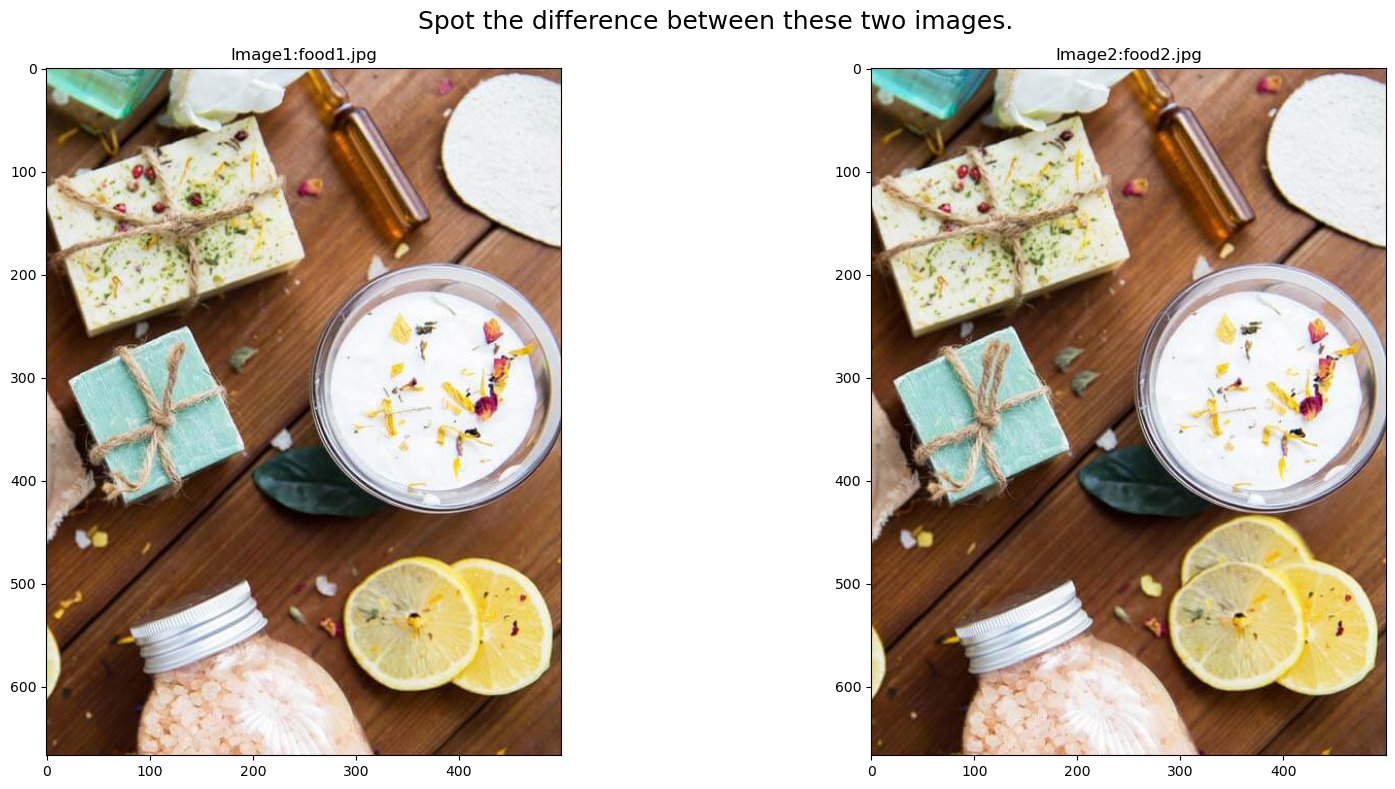

In [27]:
side_by_side_images(Image_file1, Image_file2, 18, 8)

2024-11-23 21:53:32.363050  Comparing image: outputs/food1_Input_image1.jpg with outputs/food1_Input_image2.jpg

 -------------------------------------------------- Results -------------------------------------------------- 

Number of differences = 6 | similarity index = 0.9198863419190031 


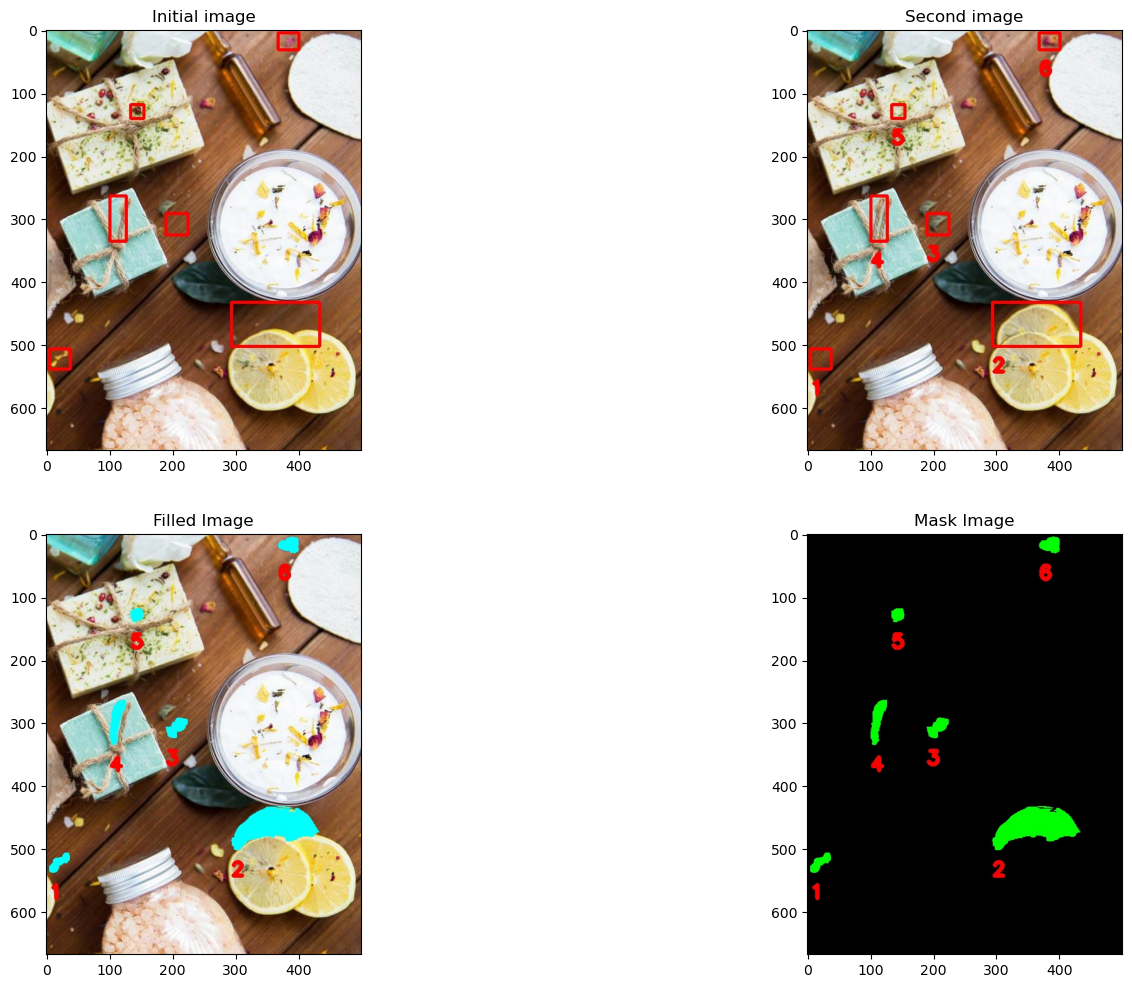

In [29]:
viewing_images(18, 12)

## EXAMPLE 2

In [32]:
Image_file1 = 'city1.jpg'
Image_file2 = 'city2.jpg'
check_image(Image_file1, Image_file2)

Files are available. Images should have the same shape
Image file 1: city1.jpg  shape = (2109, 3167, 3)
Image file 2: city2.jpg  shape = (2109, 3167, 3)


In [34]:
Input_image1, Input_image2, maskimage, filled_image, Number_Of_Differences, score = spot_the_difference(Image_file1, Image_file2, 50)

Comparing images: city1.jpg and city2.jpg

Image Similarity: 99.25196%
Image Difference: 0.74804%

==> Number of differences = 10 


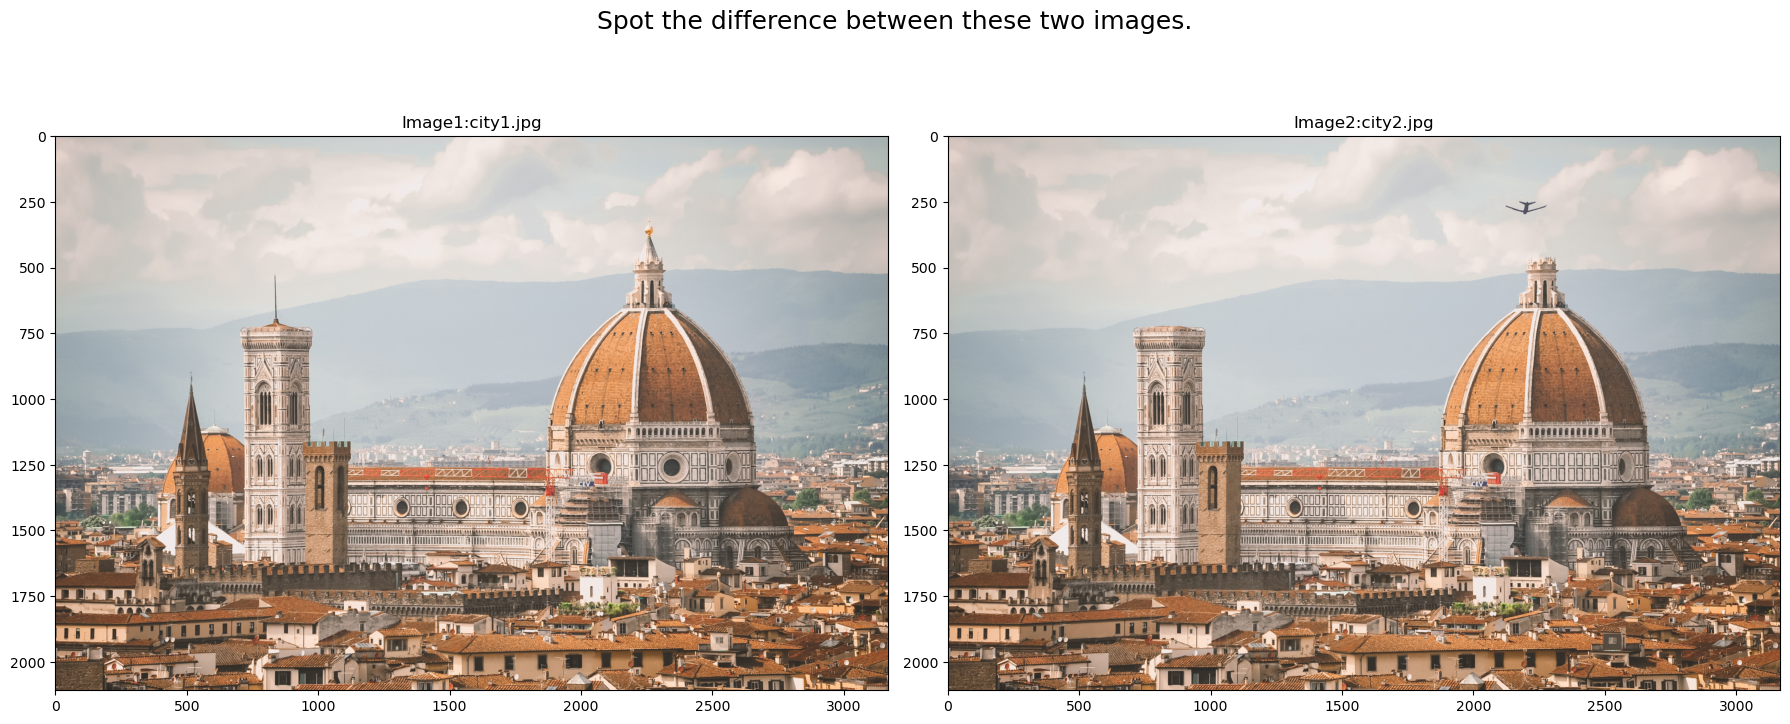

In [36]:
side_by_side_images(Image_file1, Image_file2, 18, 8)

2024-11-23 21:54:01.205738  Comparing image: outputs/city1_Input_image1.jpg with outputs/city1_Input_image2.jpg

 -------------------------------------------------- Results -------------------------------------------------- 

Number of differences = 10 | similarity index = 0.9198863419190031 


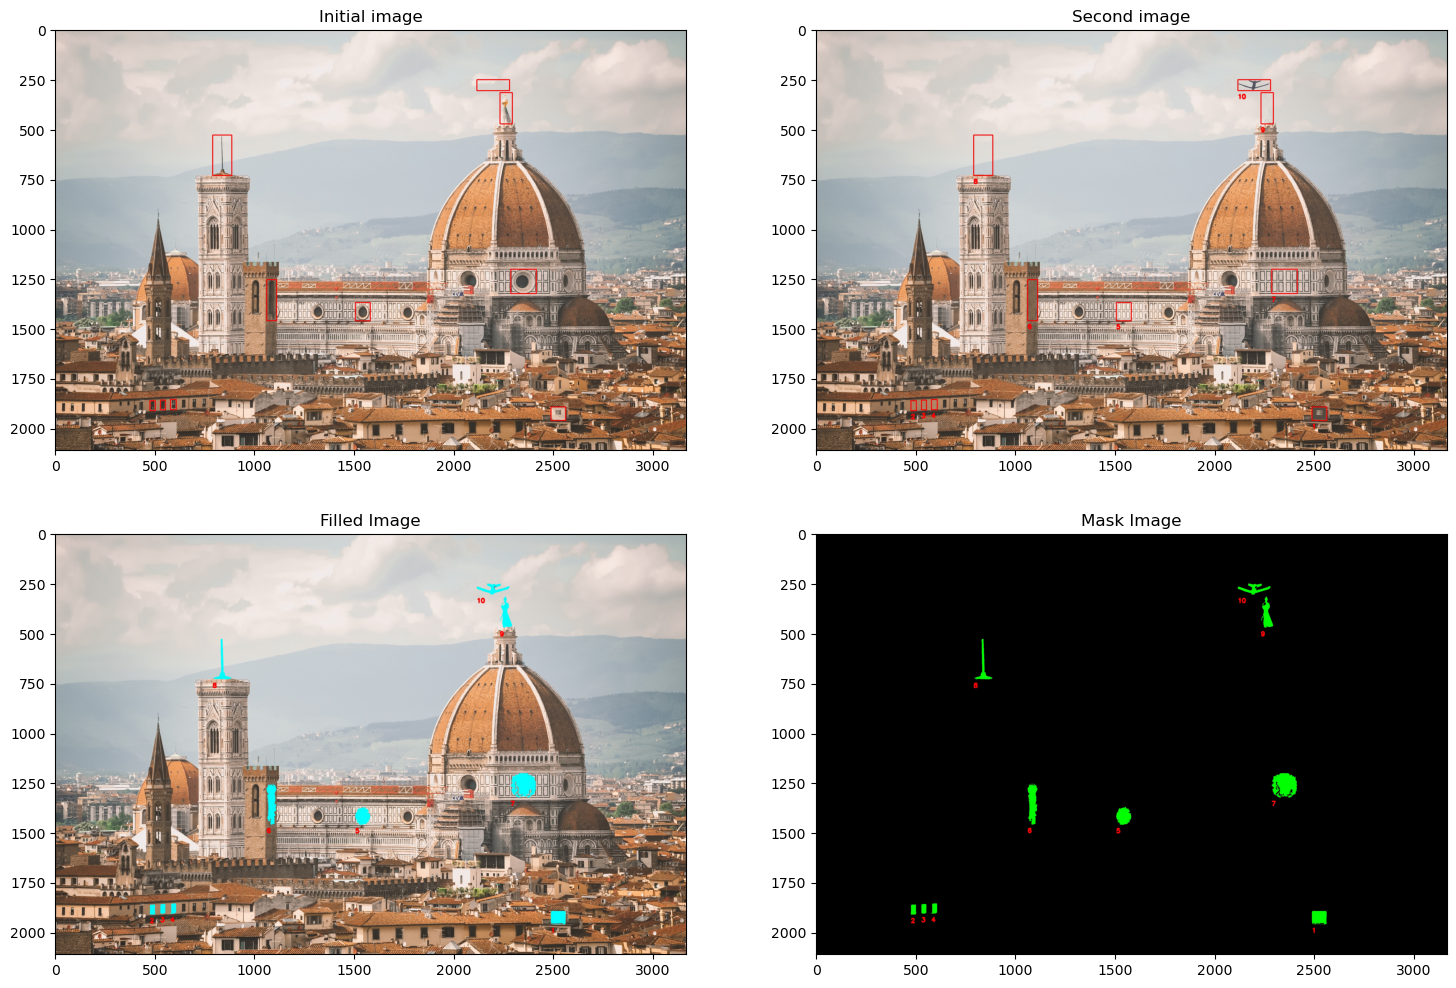

In [38]:
viewing_images(18, 12)